<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. StepLR with step size 6 and gamma value 0.1. 

Target: 
======

In this step

1. I am going to try and reduce the number of parameters less than 8000
2. I am also going to increase the LR a little more and see if that helps converge faster as the number of parameter is being reduced a little from last step
3. Target is to achieve over 99.4% validation accuracy with less than 8,000 parameters
4. Run it for less than 15 epochs

Result: 
======
1. Observed Train accuracy: 99.04%
2. Validation accuracy:99.42%
3. Number of parameters: 7,836


Analysis: 
========

1. After the model completed all the 14 epochs I saw that the model has overshooted 99.4% accuracy in multiple steps which is a good sign
2. I achieved our target with less number of parameters
3. However I want to try and experiment on reducing the parameter further and see if the model is getting stabilized even further 


In [2]:
from model import model8 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 28, 28]             108
              ReLU-2           [-1, 12, 28, 28]               0
       BatchNorm2d-3           [-1, 12, 28, 28]              24
         Dropout2d-4           [-1, 12, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,296
              ReLU-6           [-1, 12, 28, 28]               0
       BatchNorm2d-7           [-1, 12, 28, 28]              24
         Dropout2d-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,512
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:477: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [11]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


  0%|                                                                                          | 0/938 [00:00<?, ?it/s]G:\TSAI-ERA\Session 7\model.py:477: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.16147054731845856 Batch_id=937 Accuracy=94.05: 100%|██████████████████████████| 938/938 [01:29<00:00, 10.53it/s]



Test set: Average loss: 0.0387, Accuracy: 9875/10000 (98.75%)

Currently Executing Epoch: 2


Loss=0.025200236588716507 Batch_id=937 Accuracy=97.65: 100%|█████████████████████████| 938/938 [01:22<00:00, 11.32it/s]



Test set: Average loss: 0.0312, Accuracy: 9901/10000 (99.01%)

Currently Executing Epoch: 3


Loss=0.07673200219869614 Batch_id=937 Accuracy=98.16: 100%|██████████████████████████| 938/938 [01:24<00:00, 11.17it/s]



Test set: Average loss: 0.0266, Accuracy: 9919/10000 (99.19%)

Currently Executing Epoch: 4


Loss=0.005769878160208464 Batch_id=937 Accuracy=98.24: 100%|█████████████████████████| 938/938 [01:34<00:00,  9.97it/s]



Test set: Average loss: 0.0259, Accuracy: 9906/10000 (99.06%)

Currently Executing Epoch: 5


Loss=0.12057890743017197 Batch_id=937 Accuracy=98.50: 100%|██████████████████████████| 938/938 [01:18<00:00, 11.92it/s]



Test set: Average loss: 0.0230, Accuracy: 9917/10000 (99.17%)

Currently Executing Epoch: 6


Loss=0.0040787202306091785 Batch_id=937 Accuracy=98.56: 100%|████████████████████████| 938/938 [01:18<00:00, 11.97it/s]



Test set: Average loss: 0.0227, Accuracy: 9929/10000 (99.29%)

Currently Executing Epoch: 7


Loss=0.11157013475894928 Batch_id=937 Accuracy=98.92: 100%|██████████████████████████| 938/938 [01:17<00:00, 12.05it/s]



Test set: Average loss: 0.0190, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 8


Loss=0.06343580037355423 Batch_id=937 Accuracy=98.94: 100%|██████████████████████████| 938/938 [01:19<00:00, 11.80it/s]



Test set: Average loss: 0.0194, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 9


Loss=0.0018183945212513208 Batch_id=937 Accuracy=98.97: 100%|████████████████████████| 938/938 [01:19<00:00, 11.84it/s]



Test set: Average loss: 0.0194, Accuracy: 9937/10000 (99.37%)

Currently Executing Epoch: 10


Loss=0.017197338864207268 Batch_id=937 Accuracy=98.91: 100%|█████████████████████████| 938/938 [01:18<00:00, 12.00it/s]



Test set: Average loss: 0.0185, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 11


Loss=0.000803466304205358 Batch_id=937 Accuracy=99.02: 100%|█████████████████████████| 938/938 [01:18<00:00, 11.93it/s]



Test set: Average loss: 0.0185, Accuracy: 9937/10000 (99.37%)

Currently Executing Epoch: 12


Loss=0.0069078104570508 Batch_id=937 Accuracy=99.01: 100%|███████████████████████████| 938/938 [01:19<00:00, 11.79it/s]



Test set: Average loss: 0.0186, Accuracy: 9938/10000 (99.38%)

Currently Executing Epoch: 13


Loss=0.02728866972029209 Batch_id=937 Accuracy=98.99: 100%|██████████████████████████| 938/938 [01:21<00:00, 11.54it/s]



Test set: Average loss: 0.0183, Accuracy: 9935/10000 (99.35%)

Currently Executing Epoch: 14


Loss=0.03281053528189659 Batch_id=937 Accuracy=99.04: 100%|██████████████████████████| 938/938 [01:22<00:00, 11.40it/s]



Test set: Average loss: 0.0182, Accuracy: 9936/10000 (99.36%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [12]:
from utils import plot_loss

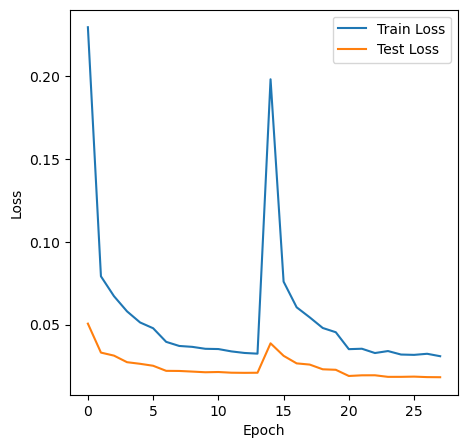

In [13]:
plot_loss(train_losses, test_losses)

In [14]:
from utils import plot_accuracy

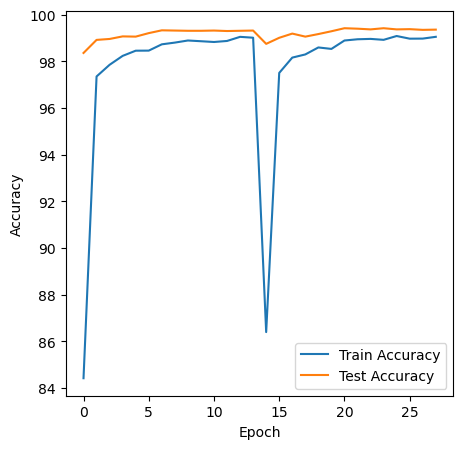

In [15]:
plot_accuracy(train_acc, test_acc)

Summary
=========
